<a href="https://colab.research.google.com/github/eliranda/test10/blob/main/YOLO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 906.9/906.9 kB 22.0 MB/s eta 0:00:00



0: 480x640 1 person, 1 bus, 1 train, 3 traffic lights, 2 stop signs, 528.5ms
Speed: 6.7ms preprocess, 528.5ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


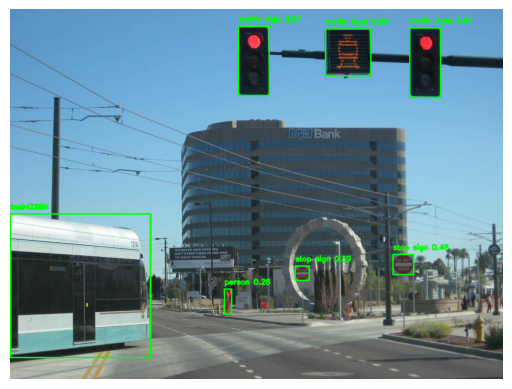

In [30]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

# טעינת מודל YOLO
model = YOLO("yolov8s.pt")

# קריאה לתמונה
img_path = '/content/drive/MyDrive/פרויקט גמר יד/machielearning/0affdf85ae6f4fa6_jpg.rf.fc42e2e0b0f63c17eae412fb22fd727a.jpg'
img = cv2.imread(img_path)

# הרצת הזיהוי
results = model(img)

# ציור תיבות זיהוי על התמונה
for result in results:
    for box in result.boxes:
        x1, y1, x2, y2 = box.xyxy[0].cpu().numpy()  # קואורדינטות התיבה כערכי numpy
        confidence = box.conf[0].item()  # רמת ביטחון
        class_id = int(box.cls[0].item())  # מזהה הקטגוריה

        # ציור התיבה
        cv2.rectangle(img, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 2)
        # הוספת שם הקטגוריה ורמת הביטחון
        cv2.putText(img, f"{model.names[class_id]} {confidence:.2f}", (int(x1), int(y1) - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

# הצגת התמונה עם matplotlib
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


In [31]:
for result in results:
    for box in result.boxes:
        class_id = int(box.cls)
        confidence = box.conf  # רמת הביטחון בזיהוי
        x1, y1, x2, y2 = box.xyxy[0].cpu().numpy()
        print(f"Object: {model.names[class_id]}, Confidence: {confidence}, Box: [{x1}, {y1}, {x2}, {y2}]")


Object: traffic light, Confidence: tensor([0.9092]), Box: [474.45233154296875, 36.576141357421875, 538.4130859375, 179.63082885742188]
Object: traffic light, Confidence: tensor([0.9078]), Box: [830.5382690429688, 39.70027542114258, 894.0625, 183.3997344970703]
Object: bus, Confidence: tensor([0.6761]), Box: [1.693457007408142, 425.2240295410156, 291.47161865234375, 723.5027465820312]
Object: train, Confidence: tensor([0.6432]), Box: [1.333886742591858, 425.18798828125, 292.29608154296875, 723.837890625]
Object: traffic light, Confidence: tensor([0.4983]), Box: [655.0413208007812, 41.592002868652344, 749.6129760742188, 138.38693237304688]
Object: stop sign, Confidence: tensor([0.4563]), Box: [795.9375, 509.6346740722656, 838.4226684570312, 551.4391479492188]
Object: stop sign, Confidence: tensor([0.3895]), Box: [592.1868286132812, 533.4171142578125, 621.5672607421875, 563.2131958007812]
Object: person, Confidence: tensor([0.2760]), Box: [445.4496154785156, 581.0447998046875, 460.5818481

In [34]:
import cv2
import numpy as np

# טעינת התמונה
image = cv2.imread("/content/drive/MyDrive/פרויקט גמר יד/machielearning/0affdf85ae6f4fa6_jpg.rf.fc42e2e0b0f63c17eae412fb22fd727a.jpg")

# קואורדינטות מהמודל (x_min, y_min, x_max, y_max)
x_min, y_min, x_max, y_max = 474.45233154296875, 36.576141357421875, 538.4130859375, 179.63082885742188
x_min, y_min, x_max, y_max = map(int, [x_min, y_min, x_max, y_max])

# חיתוך האזור מתוך התמונה
cropped_region = image[y_min:y_max, x_min:x_max]

# המרה למודל צבעים HSV
hsv_region = cv2.cvtColor(cropped_region, cv2.COLOR_BGR2HSV)

# טווחים עבור הצבע האדום ב-HSV
lower_red1 = np.array([0, 50, 50])
upper_red1 = np.array([10, 255, 255])
lower_red2 = np.array([170, 50, 50])
upper_red2 = np.array([180, 255, 255])

# יצירת מסכות לזיהוי הצבע האדום
mask1 = cv2.inRange(hsv_region, lower_red1, upper_red1)
mask2 = cv2.inRange(hsv_region, lower_red2, upper_red2)
red_mask = mask1 + mask2

# חישוב אחוז הפיקסלים האדומים
red_pixels = cv2.countNonZero(red_mask)
total_pixels = cropped_region.shape[0] * cropped_region.shape[1]
red_percentage = (red_pixels / total_pixels) * 100

# בדיקת נוכחות הצבע האדום
if red_percentage > 5:  # לדוגמה, אם מעל 5% מהאזור הוא אדום
    print("יש צבע אדום באזור")
else:
    print("אין צבע אדום באזור")


יש צבע אדום באזור
